In [5]:
import sys
import numpy as np
sys.path.append('../')
from TwitterKeeper.Twitter_keeper import PullTweetsData
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

class main(PullTweetsData):
    def tokenize(self,d):  
        result = d.split("/")
        result = list(filter(None, result))
        return result

    def prepared_Text(self,text_list):
        new_text = []
        for text in text_list:
            new_text.append(self.preprocessText(text))
        return new_text
        
    def MostWordFinder(self,keyword):
        self.connectToDB("twitter_keeper","tweets")
        vectorizer = CountVectorizer(tokenizer=self.tokenize)
        transformed_data = vectorizer.fit_transform(self.prepared_Text(self.find_tweets("keyword",keyword,"return")))
        keyword_df1 = pd.DataFrame(columns = ['word', 'count'])
        keyword_df1['word'] = vectorizer.get_feature_names_out()
        print(vectorizer.get_feature_names_out())
        keyword_df1['count'] = np.ravel(transformed_data.sum(axis=0))   
        result = keyword_df1.sort_values(by=['count'], ascending=False).head(10)
        return keyword_df1

TweetsCounter = main()

In [3]:
tweets = ["I/love/machine/learning", "machine/learning/is/fun", "I/am/learning/machine/learning", "I/am/a/machine/learning/engineer"]
def tokenize(d):  
        result = d.split("/")
        result = list(filter(None, result))
        print(result)
        return result

vectorizer = CountVectorizer(tokenizer=tokenize)

transformed_data = vectorizer.fit_transform(tweets)

print(vectorizer.get_feature_names_out())

X = transformed_data.toarray()

print(X)

print(np.ravel(transformed_data.sum(axis=0)))

['i', 'love', 'machine', 'learning']
['machine', 'learning', 'is', 'fun']
['i', 'am', 'learning', 'machine', 'learning']
['i', 'am', 'a', 'machine', 'learning', 'engineer']
['a' 'am' 'engineer' 'fun' 'i' 'is' 'learning' 'love' 'machine']
[[0 0 0 0 1 0 1 1 1]
 [0 0 0 1 0 1 1 0 1]
 [0 1 0 0 1 0 2 0 1]
 [1 1 1 0 1 0 1 0 1]]
[1 2 1 1 3 1 5 1 4]


In [7]:
from prettytable import PrettyTable

x = PrettyTable()
result = TweetsCounter.MostWordFinder("#Onet66")
x.field_names = list(result.columns)

for row in result.itertuples():
    x.add_row(row[1:])

print(x)

['\\\\' 'a' 'about' ... '🇰🇷' '🇹🇼' '🇺🇸']
+----------------------------------------------------+-------+
|                        word                        | count |
+----------------------------------------------------+-------+
|                         \\                         |   9   |
|                         a                          |   10  |
|                       about                        |   4   |
|                       abyss                        |   8   |
|                      acspfac                       |   1   |
|                       after                        |   3   |
|                        air                         |   1   |
|            aisshopsiamcenterxnonttanont            |   1   |
|                     allticket                      |   1   |
|                       alpha                        |   2   |
|                        also                        |   1   |
|                        amp                         |   18  |
|              

In [5]:
%matplotlib tk

/var/folders/_f/13r64vc532x5l684b396q_1r0000gn/T/ipykernel_2157/1021968382.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


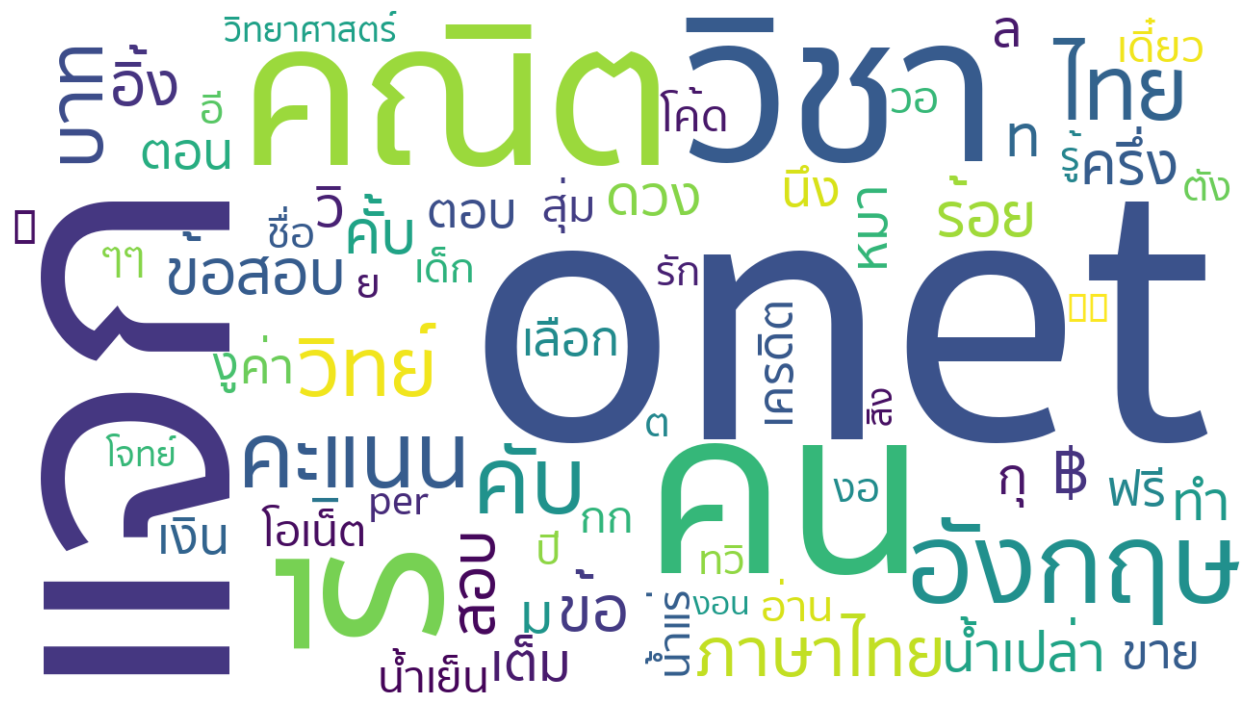

In [8]:
word_dict = {}
for i in range(0,len(result)):
  word_dict[result.word[i]]= result['count'][i]
wordcloud = WordCloud(width=1280,height=720,font_path='./SukhumvitSet-Medium.ttf',background_color ='white',max_words=70).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()
